In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform as sp_uniform

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

import seaborn as sns

# To get new datatypes and functions
from collections import Counter

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

In [2]:
train_df = pd.read_csv('C:\\Users\\Asus\\Desktop\\train.csv')
test_df = pd.read_csv('C:\\Users\\Asus\\Desktop\\test.csv')
# Combine boths dataframes
train_df['Data'] = 'train'
test_df['Data'] = 'test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = both_df['subject'].astype(str)
train_df["subject"] = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\train\\subject_train.txt",
                                  header = None, squeeze = True) #squeeze = True will return data in pandas series format
train_df["activity_labels"] = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\train\\y_train.txt",
                                          header = None, squeeze = True)
activity = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\train\\y_train.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity_labels"] = label_name
test_df["subject"] = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\test\\subject_test.txt", 
                                 header = None, squeeze = True) #squeeze = True will return data in pandas series format
test_df["activity_labels"] = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\test\\y_test.txt",
                                         header = None, squeeze = True)
activity = pd.read_csv("C:\\Users\\Asus\\Desktop\\UCI HAR Dataset\\test\\y_test.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity_labels"] = label_name
# Create label
label = both_df.pop('Activity')
print('Shape train:\t{}'.format(train_df.shape))
print('Shape test:\t{}\n'.format(test_df.shape))
both_df.head()

Shape train:	(7352, 565)
Shape test:	(2947, 565)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,train


In [3]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [4]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


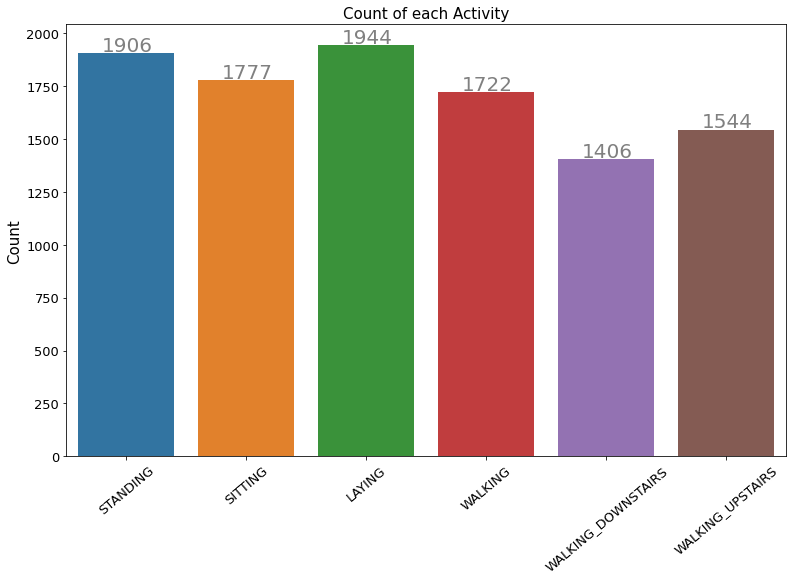

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pd.read_csv('C:\\Users\\Asus\\Desktop\\Data.csv')
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "Activity", data = data_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10,
            s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [7]:
columns = train_df.columns
columns = columns.str.replace("[()]", '')
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to
#pandas string. Pandas string has method called replace which we have used here.



train_df.columns = columns
test_df.columns = columns

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


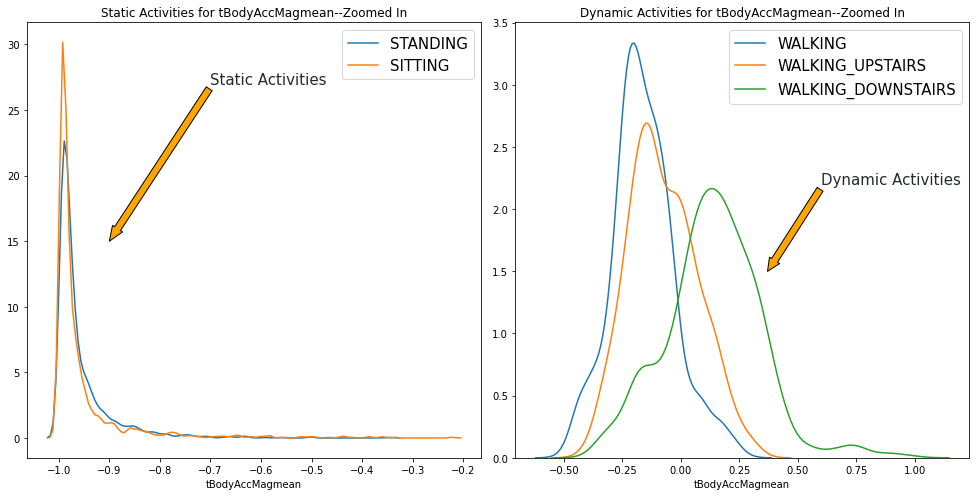

In [8]:
#let's plot "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
df_standing = train_df[train_df["Activity"] == "STANDING"]
df_sitting = train_df[train_df["Activity"] == "SITTING"]
df_lying = train_df[train_df["Activity"] == "LYING"]
df_walking = train_df[train_df["Activity"] == "WALKING"]
df_walking_upstairs = train_df[train_df["Activity"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["Activity"] == "WALKING_DOWNSTAIRS"]



fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))



axes[0].set_title("Static Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "LYING", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities', xy=(-0.90, 15), xytext=(-0.7, 27),
arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")



axes[1].set_title("Dynamic Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING", ax = axes[1])
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS", ax = axes[1])
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Dynamic Activities', xy=(0.37, 1.5), xytext=(0.60, 2.2),
arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")



plt.tight_layout()
plt.show()

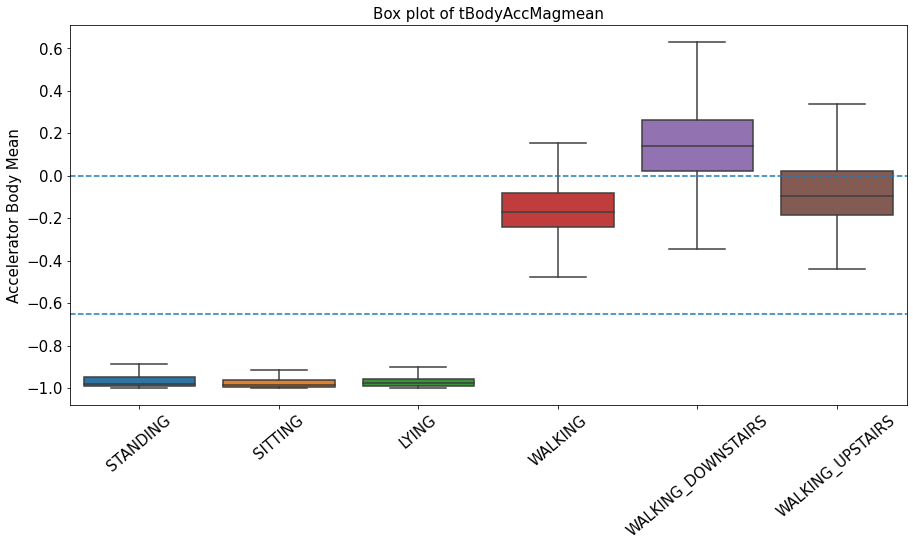

In [9]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_labels", y = "tBodyAccMagmean", showfliers = False, data = train_df)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

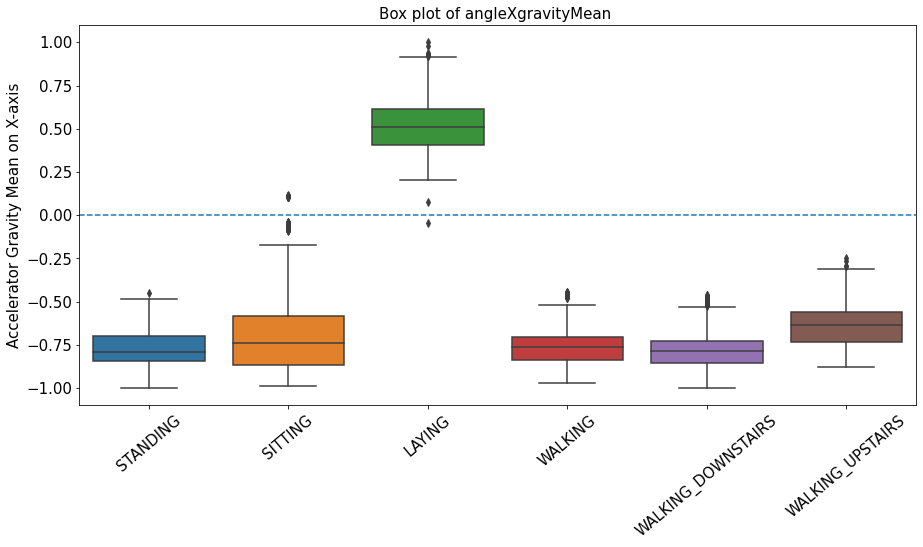

In [10]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "angleXgravityMean", showfliers = True, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of angleXgravityMean ", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

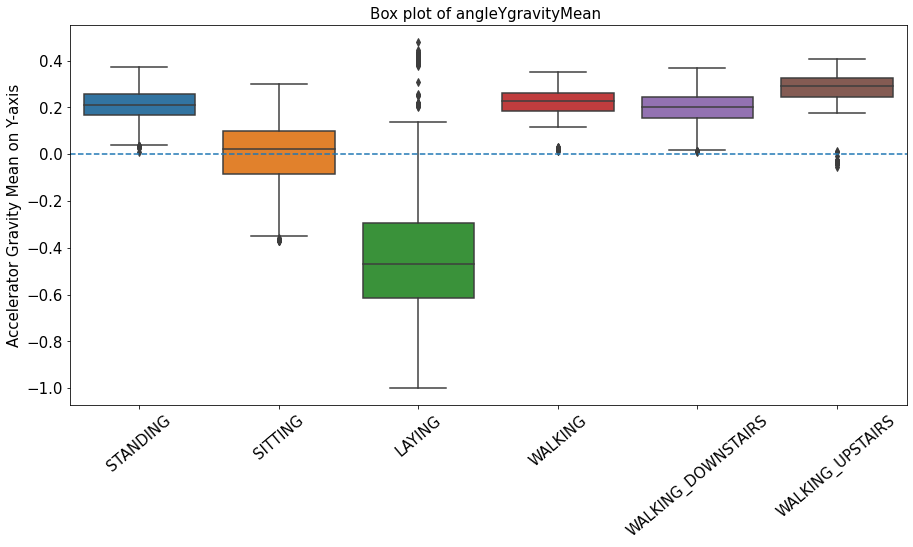

In [11]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "angleYgravityMean", showfliers = True, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of angleYgravityMean ", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on Y-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

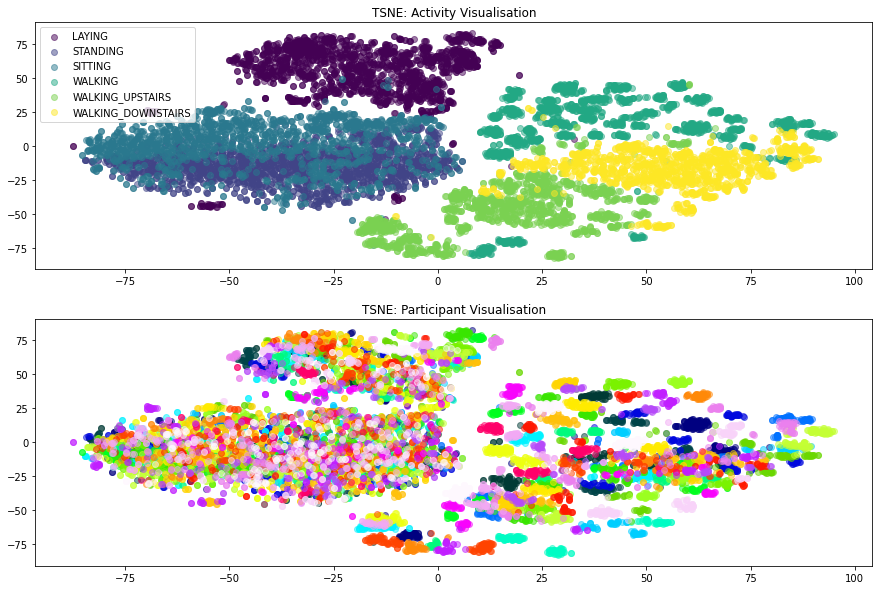

In [12]:
# Plotting data
label_counts = label.value_counts()


# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')



# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)



# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)



# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)




# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))



### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]



# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()




### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]



# Plot each participant
for i, group in enumerate(subject_data.unique()):
# Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)



axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

In [13]:
# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)
y = np.array(y_train).ravel() #2d to 1 conversion

In [14]:
X_train

array([[ 10.35528794, -11.708257  ,  -1.9538929 , ...,  -2.0137831 ,
         -0.65775352,  -0.17430295],
       [-15.21999946,   4.93821655,  -2.34910899, ...,   0.04858099,
          0.52365166,  -0.21157164],
       [-16.40948403,   5.83016746,  -0.87169788, ...,   0.25693282,
         -0.21584845,   0.18753504],
       ...,
       [ 29.41265996,   2.13264655,  -0.71372667, ...,   0.11345496,
         -0.38131181,  -0.14113574],
       [-16.56713876,   6.21671982,   1.38379393, ...,  -0.46927784,
         -0.6431541 ,   0.58002937],
       [ 10.37880965,   0.87889925,  -4.55301137, ...,  -0.06583317,
         -0.74240521,  -0.20095531]])

Printing train score:
0.9742361470740549
Printing test score:
0.9475728155339805


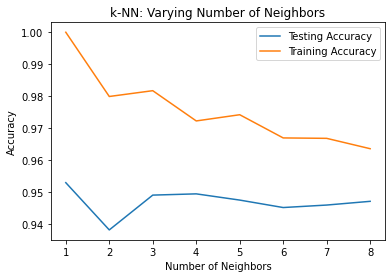

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



print("Printing train score:")
print(knn.score(X_train,y_train))



print("Printing test score:")
print(knn.score(X_test,y_test))



no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))



for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)



    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



# Visualization of k values vs accuracy



plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')



plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# LGBM

In [16]:
#Setting Parameters for lgbm model
parameters={"early_stopping_rounds":20,   #To avoid overfitting.
            "eval_metric" : 'auc',        # To specify the Evaluation metric.
            "eval_set" : [(X_test,y_test)],   #To set validation dataset.
            'eval_names': ['valid'],    
            'verbose': 100,                 #To print the data while training the model.
            'categorical_feature': 'auto'}   #To specify the categorical columns in the dataset.
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform as sp_uniform


In [17]:
#Create parameters to tune

parameter_tuning ={'max_depth': sp_randint(10,50), # To control the depth of the tree. 
             'num_leaves': sp_randint(6, 50),    # To specify the number of leaves in the tree.. it should be large 
             'learning_rate ': [0.1,0.01,0.001],  # To specify the learning rate. should be small
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100], #smaller the better
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]} #parameter should be small

In [19]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
classifier = lgb.LGBMClassifier(random_state=300, silent=True, metric='None', n_jobs=4, n_estimators=5000)
#random searcg CV :Define a search space as a bounded domain of hyperparameter values and randomly 
#sample points in that domain.
find_parameters = RandomizedSearchCV(
    estimator=classifier, param_distributions=parameter_tuning, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=300,
    verbose=False)

In [20]:
find_parameters.fit(X_train, y_train, **parameters)

C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.01


C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\U

C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Asus\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a futu

LightGBMError: Multiclass objective and metrics don't match

In [21]:
best_parameters = find_parameters.best_params_
best_parameters

{'colsample_bytree': 0.6706735412200329,
 'learning_rate ': 0.01,
 'max_depth': 20,
 'min_child_samples': 109,
 'min_child_weight': 10.0,
 'num_leaves': 33,
 'reg_alpha': 50,
 'reg_lambda': 50,
 'subsample': 0.8256371463681569}

In [22]:
best_parameters_model = lgb.LGBMClassifier(**best_parameters)
best_parameters_model.set_params(**best_parameters)

LGBMClassifier(colsample_bytree=0.6706735412200329, learning_rate =0.01,
               max_depth=20, min_child_samples=109, min_child_weight=10.0,
               num_leaves=33, reg_alpha=50, reg_lambda=50,
               subsample=0.8256371463681569)

In [23]:
# Create the model

lgbm = LGBMClassifier(colsample_bytree=0.6706735412200329, learning_rate =0.01,
               max_depth=20, min_child_samples=109, min_child_weight=10.0,
               num_leaves=33, reg_alpha=50, reg_lambda=50,
               subsample=0.8256371463681569)
lgbm = lgbm.fit(X_train, y_train)



#Test the model
score = accuracy_score(y_true=y_train, y_pred=lgbm.predict(X_train))
print('Accuracy on trainset:\t{:.4f}\n'.format(score))

Accuracy on trainset:	0.8602



In [24]:
# Create the model
lgbm = LGBMClassifier(colsample_bytree=0.6735412200329, learning_rate =0.10,
               max_depth=20, min_child_samples=109, min_child_weight=10.0,
               num_leaves=33, reg_alpha=0, reg_lambda=0,
               subsample=0.8256371463681569)
lgbm = lgbm.fit(X_train, y_train)



#Test the model
score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

Accuracy on testset:	0.9515



In [25]:
# Store the data
data = []
# Iterate over each activity
for activity in label_counts.index:
    # Create dataset
    act_data = both_df[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')

    # Scale data
    scl = StandardScaler()
    act_data = scl.fit_transform(act_data)



    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)




    # Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train, X_test, y_train, y_test = train_test_split(act_data, label_encoded, random_state=3)




    # Fit basic model
    print('Activity: {}'.format(activity))
    lgbm = LGBMClassifier(colsample_bytree=0.6735412200329, learning_rate =0.10,
               max_depth=20, min_child_samples=109, min_child_weight=10.0,
               num_leaves=33, reg_alpha=0, reg_lambda=0,
               subsample=0.8256371463681569)
    lgbm = lgbm.fit(X_train, y_train)

    score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	0.5802

Activity: STANDING
Accuracy on testset:	0.4927

Activity: SITTING
Accuracy on testset:	0.4225

Activity: WALKING
Accuracy on testset:	0.9490

Activity: WALKING_UPSTAIRS
Accuracy on testset:	0.8653

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	0.8267



In [26]:
# Create duration datafrae
duration_df = (both_df.groupby([label, subject_data])['Data'].count().reset_index().groupby('Activity').agg({'Data':'mean'}) * 1.28).rename(columns={'Data':'Seconds'})
activity_df = pd.DataFrame(data, columns=['Activity', 'Accuracy']).set_index('Activity')
activity_df.join(duration_df)

,Accuracy,Seconds
Activity,,
LAYING,0.580247,82.944000
STANDING,0.492662,81.322667
SITTING,0.422472,75.818667
WALKING,0.948956,73.472000
WALKING_UPSTAIRS,0.865285,65.877333
WALKING_DOWNSTAIRS,0.826705,59.989333


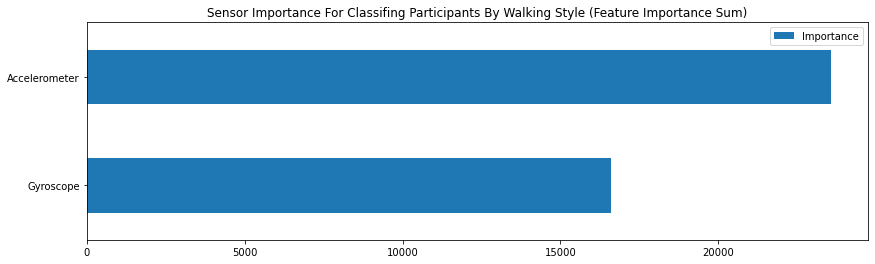

In [27]:
#get importsnces
tsne_data = both_df[label=='WALKING'].copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(subject_data)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)


# Create model
lgbm = LGBMClassifier(n_estimators=500, random_state=3)
lgbm = lgbm.fit(X_train, y_train)

# Get importances
features = both_df.drop(['Data', 'subject'], axis=1).columns
importances = lgbm.feature_importances_

# Sum importances
data = {'Gyroscope':0, 'Accelerometer':0}
for importance, feature in zip(importances, features):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance
        
# Create dataframe and plot
sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By Walking Style (Feature Importance Sum)')
plt.show()

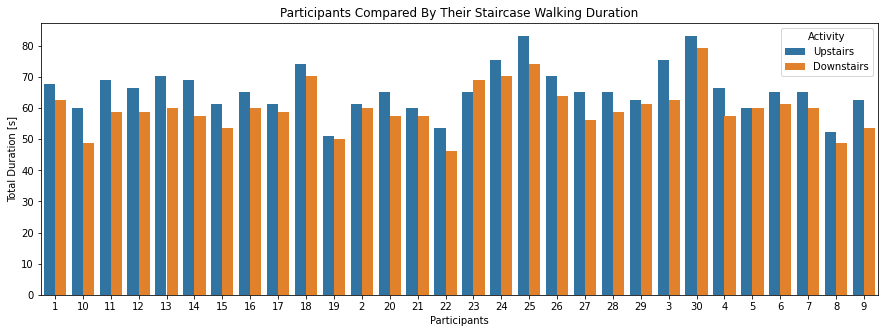

In [28]:
# Group the data by participant and compute total duration of staircase walking
mask = label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
duration_df = (both_df[mask].groupby([label[mask], 'subject'])['Data'].count() * 1.28)



# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})



plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()